<a href="https://colab.research.google.com/github/sashank1326/ML_Practice/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/house_price_train.csv")
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [20]:
X = df[['LotArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)


 # Predicting on the test set
y_pred = model.predict(X_test)

#  # Calculating Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# mae=mean_absolute_error(y_test, y_pred)
# rmse=np.sqrt(mse)
# r2=r2_score(y_test, y_pred)

# # Coefficient (m) and Intercept (c)
# m = model.coef_[0]
# c = model.intercept_


# Create a DataFrame with YrSold, actual, and predicted prices
results_df = X_test.copy()
results_df['Actual_SalePrice'] = y_test.values
results_df['Predicted_SalePrice'] = y_pred

# Print the resulting DataFrame
print(results_df.head(10))  # print first 10 rows



      LotArea  Actual_SalePrice  Predicted_SalePrice
1368     4435            144000        151755.917112
712      4671            189000        152864.357017
241      3880            110500        149149.204622
877      8834            350000        172417.049076
537     12735            111250        190739.184970
179      8520            100000        170942.260389
1013     7200             85000        164742.511765
14      10920            157000        182214.530613
596      3600            114504        147834.106429
176     10029            211000        178029.700292


**LR without Regularization**

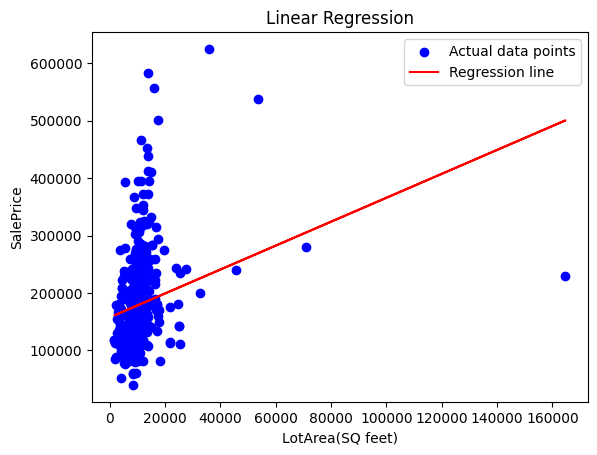

In [15]:
# Plotting
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('LotArea(SQ feet)')
plt.ylabel('SalePrice')
plt.title('Linear Regression')
plt.legend()
plt.show()

# **LR after Regularization(Lasso)**

Mean Squared Error: 7689782687.98441
Model Coefficients: [1.66934621]n
      LotArea  Actual_SalePrice  Predicted_SalePrice
1207     9135            200000        175458.112308
791     11333            146800        179127.335280
490      2665            115000        164657.442321
208     14364            277000        184187.123647
1234     8525            130000        174439.811119
481     11846            374000        179983.709887
578      3604            146000        166224.958413
807     21384            223500        195905.934050
453      9000            210000        175232.750569
158     12552            254900        181162.268312


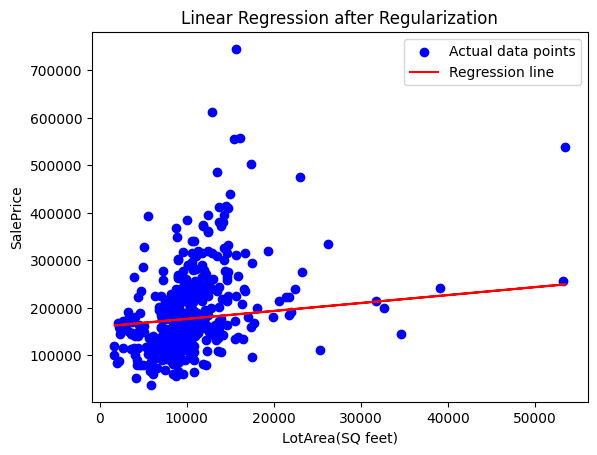

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lasso = Lasso(alpha=100)
# training the model
lasso.fit(X_train, y_train)

# making predictions
y_pred = lasso.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}n")

# Create a DataFrame with YrSold, actual, and predicted prices
results_df = X_test.copy()
results_df['Actual_SalePrice'] = y_test.values
results_df['Predicted_SalePrice'] = y_pred

# Print the resulting DataFrame
print(results_df.head(10))

# Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('LotArea(SQ feet)')
plt.ylabel('SalePrice')
plt.title('Linear Regression after Regularization')
plt.legend()
plt.show()

# **Ridge Regularization**

Mean Squared Error: 6871630088.968552
Model Coefficients: [1.65726173]n


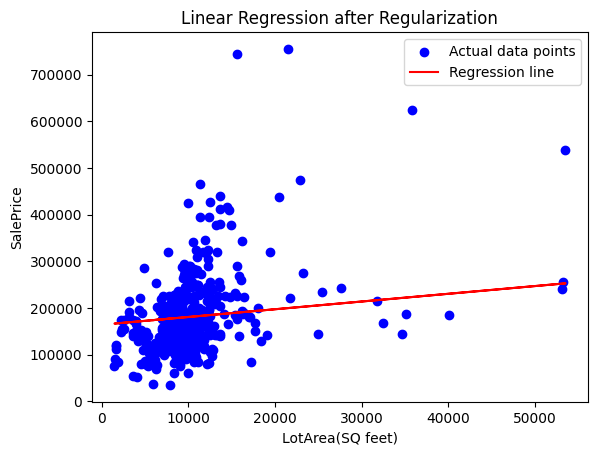

      LotArea  Actual_SalePrice  Predicted_SalePrice
107      6000            115000        173853.011314
835      9600            128000        179819.153539
1188     8935            195000        178717.074489
804      9000            118000        178824.796501
1159     9120            185000        179023.667909
942      7711            150000        176688.586133
370      8121            172400        177368.063441
537     12735            111250        185014.669060
23       4224            129900        170909.714483
275      7264            205000        175947.790140
261      9588            276000        179799.266398
762      8640            215200        178228.182279
24       8246            154000        177575.221158
222     11475            179900        182926.519281
1129     7200            140000        175841.725389
503     15602            289000        189766.038438
997     11717            185000        183327.576620
1401     7415            193000        176198.

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

# making predictions
y_pred = ridge.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}n")

# Create a DataFrame with YrSold, actual, and predicted prices
results_df = X_test.copy()
results_df['Actual_SalePrice'] = y_test.values
results_df['Predicted_SalePrice'] = y_pred

#plotting
plt.scatter(X_test, y_test, color='blue', label='Actual data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('LotArea(SQ feet)')
plt.ylabel('SalePrice')
plt.title('Linear Regression after Regularization')
plt.legend()
plt.show()

print(results_df.head(20))